In [1]:
import nltk
persuasion_raw = nltk.corpus.gutenberg.words('austen-persuasion.txt')
moby_raw = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [2]:
persuasion_raw[:10]

['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ']', 'Chapter', '1', 'Sir']

In [3]:
def chunk(doc, chunk_size=5000):
    return [doc[i:i+chunk_size] for i in range(0, len(doc), chunk_size)]

In [4]:
persuasion_chunks = chunk(persuasion_raw)
moby_chunks = chunk(moby_raw)

In [5]:
print(len(persuasion_chunks))
print(len(moby_chunks))

20
53


In [6]:
import pandas as pd
all_docs = pd.DataFrame({'words':persuasion_chunks + moby_chunks})
all_docs.head()

,words
0,"([, Persuasion, by, Jane, Austen, 1818, ], Cha..."
1,"(with, the, daughter, of, Mr, Shepherd, ,, who..."
2,"(ever, with, her, own, discretion, ,, never, w..."
3,"(,, without, much, waiting, for, an, answer, ;..."
4,"(father, ,, through, the, gloom, of, the, even..."


In [8]:
all_docs["chunks"] = all_docs["words"].str.join(" ")
all_docs["chunks"].head()

0    [ Persuasion by Jane Austen 1818 ] Chapter 1 S...
1    with the daughter of Mr Shepherd , who had ret...
2    ever with her own discretion , never wished th...
3    , without much waiting for an answer ; or in t...
4    father , through the gloom of the evening , to...
Name: chunks, dtype: object

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(stop_words='english') 
tf = tf_vectorizer.fit_transform(all_docs['chunks'])

In [11]:
tf

<73x18446 sparse matrix of type '<class 'numpy.int64'>'
	with 79224 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.decomposition import LatentDirichletAllocation

In [43]:
num_topics = 2
lda = LatentDirichletAllocation(n_components=num_topics, 
                                random_state=42, max_iter=100)

In [44]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=2, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [45]:
document_topic = lda.transform(tf)

In [46]:
document_topic.shape

(73, 2)

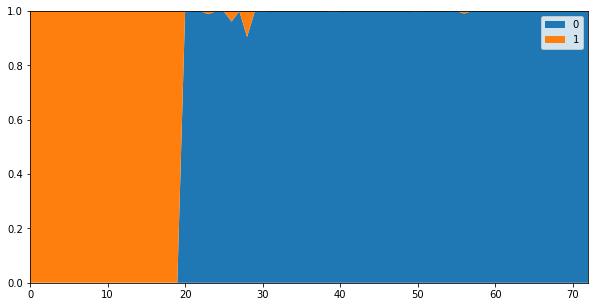

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(0, document_topic.shape[0])
_ = ax.stackplot(x, document_topic.T, 
                 labels=range(10))
_ = ax.set_xlim(x[0], x[-1])
_ = ax.set_ylim(0,1)
_ = ax.legend()

In [48]:
topic_word = lda.components_
topic_word.shape

(2, 18446)

In [49]:
words = np.array(tf_vectorizer.get_feature_names())
for i, topic in enumerate(topic_word):
    sorted_idx = topic.argsort()[::-1]
    #print(i, dict(zip(words[sorted_idx][:10], 
    #             topic[sorted_idx][:10])))
    print(i, words[sorted_idx][:10])

0 ['whale' 'like' 'man' 'ship' 'ahab' 'ye' 'sea' 'old' 'head' 'boat']
1 ['anne' 'captain' 'mrs' 'elliot' 'mr' 'lady' 'wentworth' 'good' 'little'
 'said']
